<a href="https://www.kaggle.com/code/justravina/my-first-hackathon-working-again-0-75-0-91-0-93?scriptVersionId=180184123" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv


# dataset 1st --diabetes_binary_5050

In [2]:
data=pd.read_csv("/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv",sep=",")

In [3]:
data.shape

(70692, 22)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [5]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


****bmi ,mentalhealth,physical health are deviating the most from mean ****

In [6]:
# newfeature=((data["MentHlth"])+(data["PhysHlth"]))*(data["BMI"])

In [7]:
# newfeature=pd.DataFrame(newfeature)
# newfeature.value_counts()

In [8]:
y=data["Diabetes_binary"]

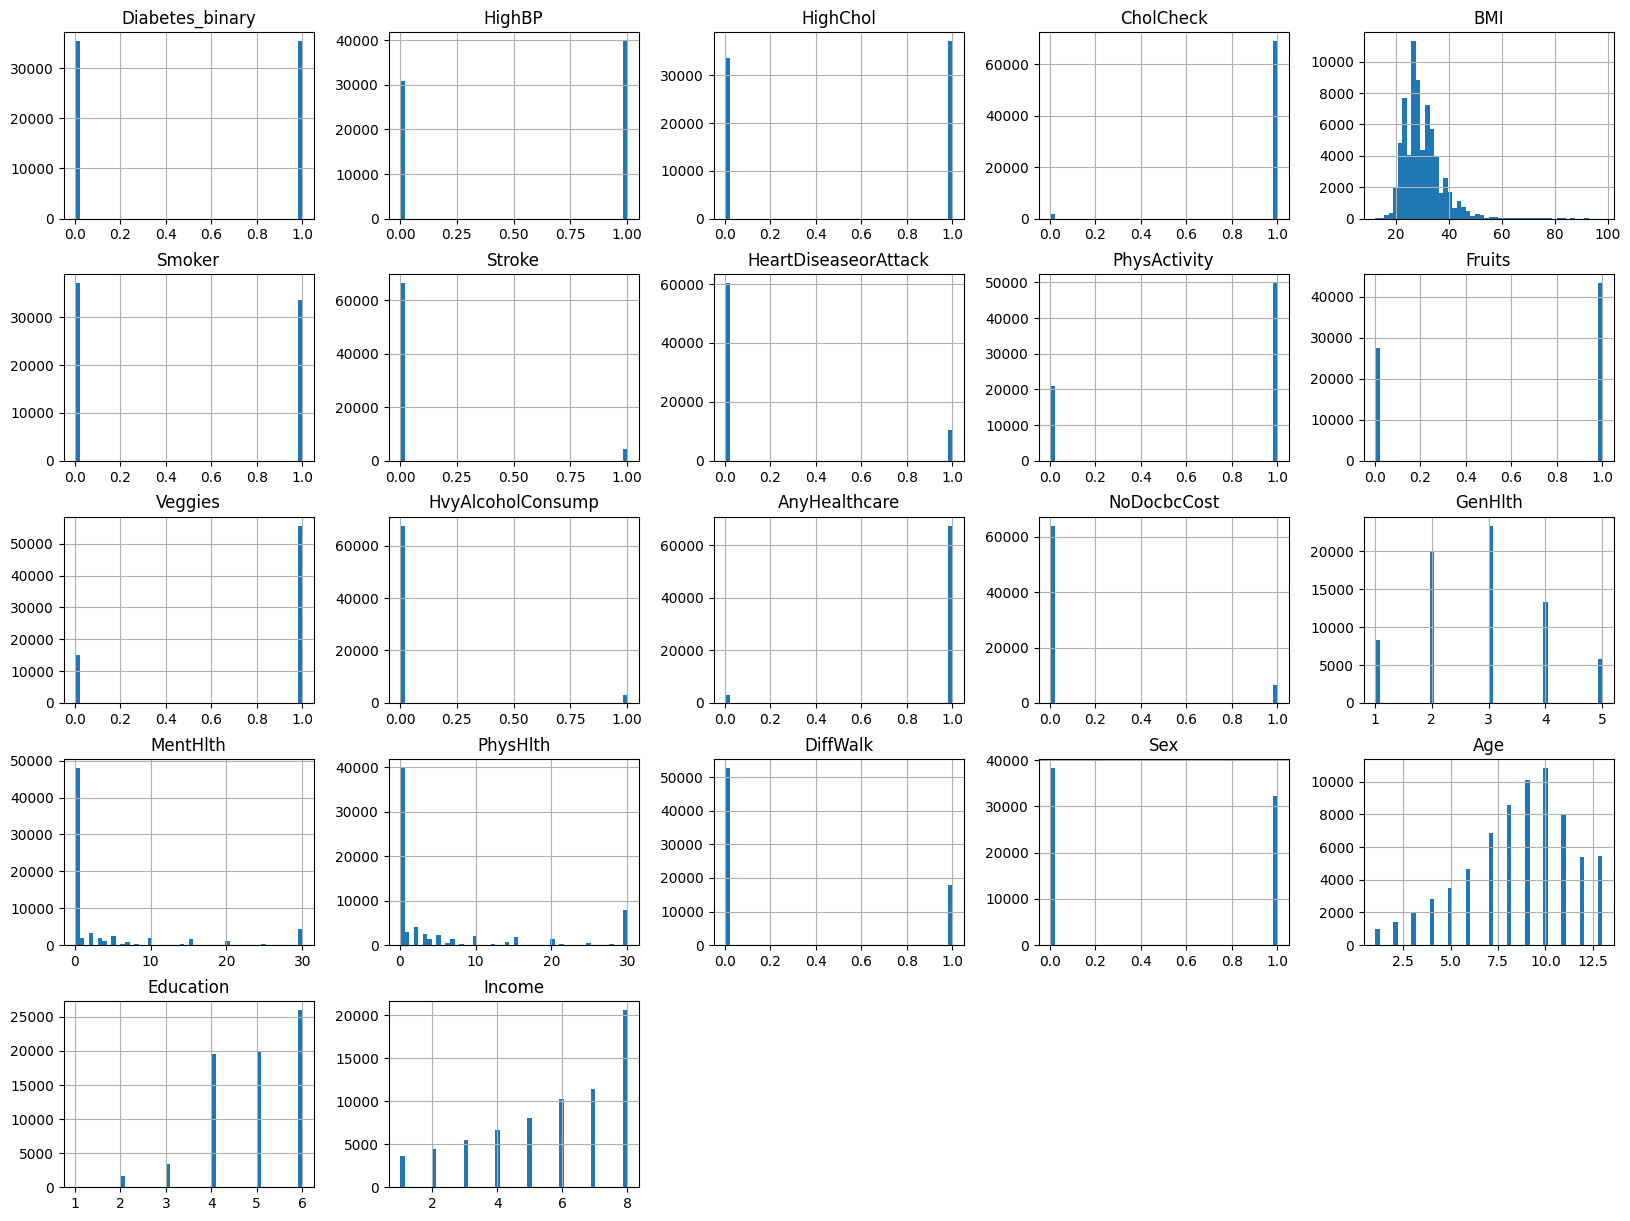

In [9]:
import matplotlib.pyplot as plt 
data.hist(bins=50,figsize=(20,15))
plt.show()

In [10]:
data=data.drop(["Diabetes_binary","MentHlth","PhysHlth"],axis=1)

In [11]:
data=data.drop(["Sex"],axis=1)

In [12]:
data.head(4)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Age,Education,Income
0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,4.0,6.0,8.0
1,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,12.0,6.0,8.0
2,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,13.0,6.0,8.0
3,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,11.0,6.0,8.0


In [13]:
import matplotlib.pyplot as plt 

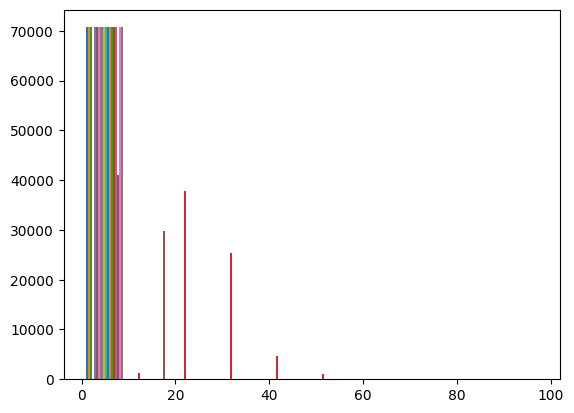

In [14]:
plt.hist(data)
plt.show()

In [15]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [16]:
rscaler=RobustScaler()

In [17]:
# data["newfeature"]=newfeature

In [18]:
data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Age,Education,Income
0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,4.0,6.0,8.0
1,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,12.0,6.0,8.0
2,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,13.0,6.0,8.0
3,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,11.0,6.0,8.0
4,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,8.0,5.0,8.0


In [19]:
data=rscaler.fit_transform(data)

In [20]:
scaler=StandardScaler()

In [21]:
data=scaler.fit_transform(data)

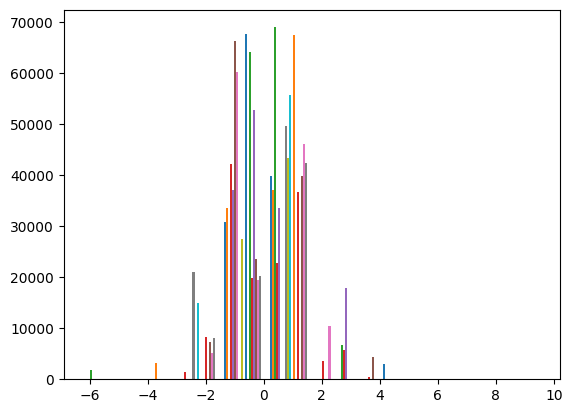

In [22]:
plt.hist(data)
plt.show()

In [23]:
from sklearn.feature_selection import SelectKBest

In [24]:
# selector=SelectKBest(k=15)

In [25]:
# df=selector.fit_transform(data,y)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
xtrain,xval,ytrain,yval=train_test_split(data,y,random_state=0,test_size=0.2,shuffle=True,stratify=y)

In [28]:
xtrain.shape,xval.shape,ytrain.shape,ytrain.shape

((56553, 18), (14139, 18), (56553,), (56553,))

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

In [30]:
from sklearn.neural_network import MLPClassifier

In [31]:
model=MLPClassifier(random_state=0)

In [32]:
model=GradientBoostingClassifier(random_state=0)

In [33]:
model.fit(xtrain,ytrain)

GradientBoostingClassifier(random_state=0)

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
score=cross_val_score(model,xval,yval,cv=5)

In [36]:
score

array([0.7549505 , 0.74717115, 0.75247525, 0.76803395, 0.74849664])

In [37]:
model.score(xval,yval)

0.75493316359007

In [38]:
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay

In [39]:
ypredict=model.predict(xval)

In [40]:
f1_score(yval,ypredict)

0.7630445189085687

In [41]:
accuracy_score(yval,ypredict)

0.75493316359007

In [42]:
roc_auc_score(yval,ypredict)

0.7549355884399143

In [43]:
cm=confusion_matrix(yval,ypredict)

In [44]:
import seaborn as sns

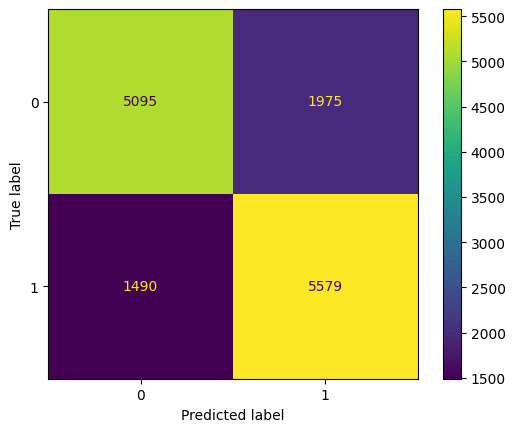

In [45]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot()
plt.show()


# dataset 2nd --diabetes_binary_health

In [46]:
dataset=pd.read_csv("/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv",sep=",")

In [47]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [49]:
y=dataset["Diabetes_binary"]

In [50]:
dataset=dataset.drop(["Diabetes_binary"],axis=1)

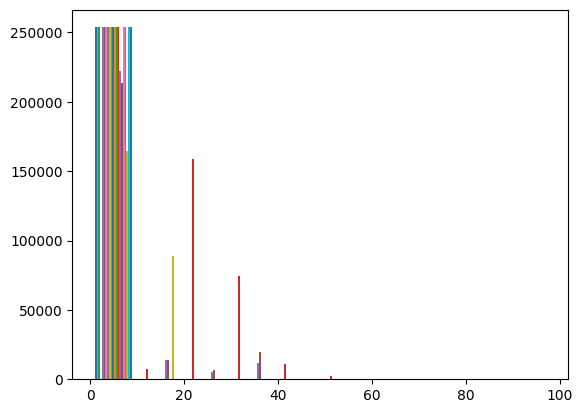

In [51]:
plt.hist(dataset)
plt.show()

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler=StandardScaler()

In [54]:
dff=scaler.fit_transform(dataset)

<function matplotlib.pyplot.show(close=None, block=None)>

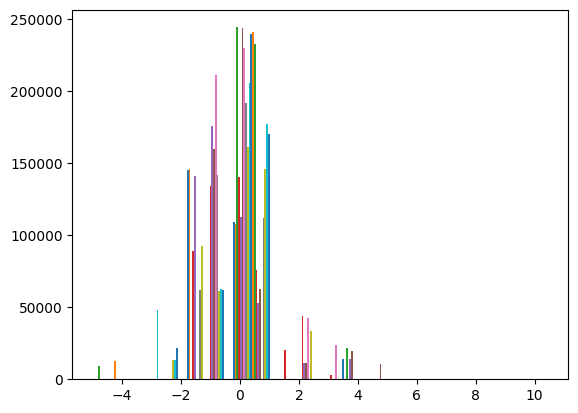

In [55]:
plt.hist(dff)
plt.show

In [56]:
from imblearn.over_sampling import SMOTE 

In [57]:
smote=SMOTE()

In [58]:
xtrain,ytrain=smote.fit_resample(dff,y)

In [59]:
from sklearn.feature_selection import SelectKBest

In [60]:
selector=SelectKBest(k=18)
xtrain=selector.fit_transform(xtrain,ytrain)

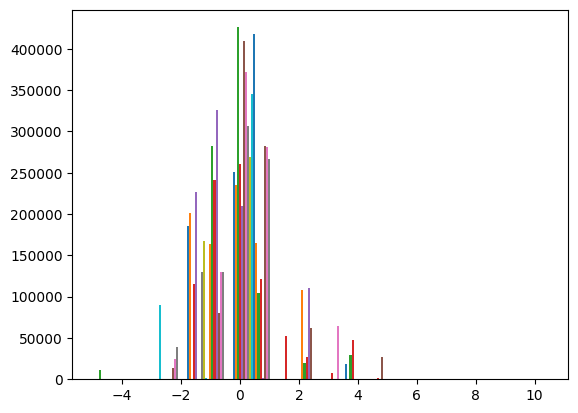

In [61]:
plt.hist(xtrain)
plt.show()

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
xt,xv,yt,yv=train_test_split(xtrain,ytrain,test_size=0.2,shuffle=True,stratify=ytrain)

In [64]:
xt.shape,xv.shape,yt.shape,yv.shape

((349334, 18), (87334, 18), (349334,), (87334,))

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [66]:
# model=LogisticRegression(random_state=0)
model=RandomForestClassifier(random_state=0,bootstrap=True,oob_score=True,warm_start=True)

In [67]:
model.fit(xt,yt)

RandomForestClassifier(oob_score=True, random_state=0, warm_start=True)

In [68]:
model.score(xt,yt)

0.9947328344793235

In [69]:
model.score(xv,yv)

0.9166991091671056

In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
scores=cross_val_score(model,xv,yv,cv=5)

In [72]:
scores

array([0.89002118, 0.88458236, 0.89047919, 0.8876739 , 0.89247681])

## diabetes_012

In [73]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [74]:
df=pd.read_csv("/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv",sep=",")

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [76]:
y=df["Diabetes_012"]

In [77]:
df=df.drop(["Diabetes_012"],axis=1)

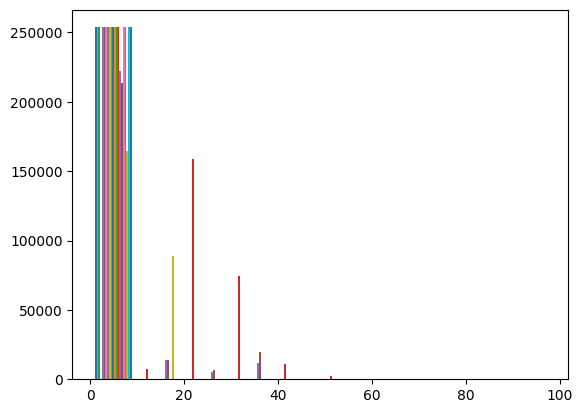

In [78]:
plt.hist(df)
plt.show()

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scaler=StandardScaler()

In [81]:
df=scaler.fit_transform(df)

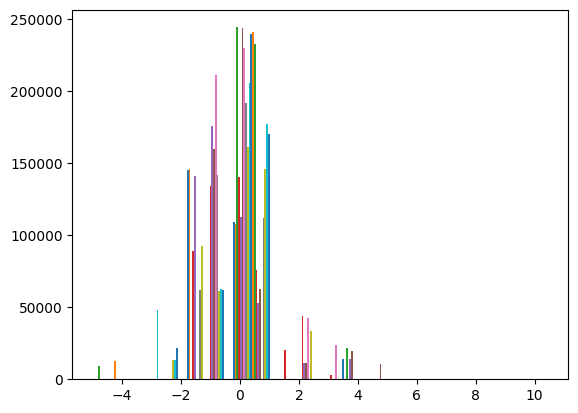

In [82]:
plt.hist(df)
plt.show()

In [83]:
from imblearn.over_sampling import SMOTE 

In [84]:
smote=SMOTE()
df,y=smote.fit_resample(df,y)

In [85]:
# df=selector.fit_transform(df,y)

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x,xvv,yy,yvv=train_test_split(df,y,test_size=0.2,stratify=y,shuffle=True,random_state=0)

In [88]:
x.shape,yy.shape,xvv.shape,yvv.shape

((512887, 21), (512887,), (128222, 21), (128222,))

In [89]:
from  sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

In [90]:
# model=GradientBoostingClassifier()
model=RandomForestClassifier()

In [91]:
model.fit(x,yy)

RandomForestClassifier()

In [92]:
model.score(xvv,yvv)

0.9320319445960912

In [93]:
score=cross_val_score(model,xvv,yvv)


In [94]:
yp=model.predict(xvv)

In [95]:
score

array([0.86172743, 0.85778904, 0.85544377, 0.85852441, 0.86070816])

In [96]:
f1_score(yvv,yp,average="weighted")

0.9320597158620971

In [97]:
accuracy_score(yvv,yp)

0.9320319445960912

In [98]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [99]:
cm=confusion_matrix(yvv,yp)

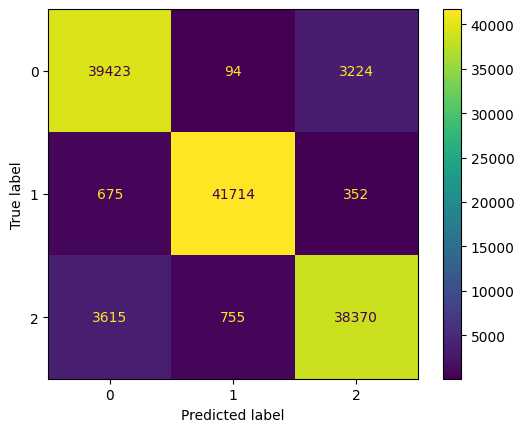

In [100]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1,2])
cm_display.plot()
plt.show()